## Part1, Task3 ---- Version 1

#### In this implementation, I set the hyperparameters as follow:

- *hidden_units = '20 18'*

- *learning_rate = 1e-2*

- *epoch = 100*

- *batch_size = 32*

#### Optimization:

- SGD optimizer **without** momentum, regularization or dropout.

#### Result Analaysis:

- The loss almost reaches convergence. 
- The training accuracy oscillates and the average is about 35%. 
- The testing accuracy is about 34.79%.

In [42]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import torch
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
from pytorch_mlp import *
from sklearn import datasets
import random
from torch.autograd import Variable
import time


# Default constants
DNN_HIDDEN_UNITS_DEFAULT = '20 18'
LEARNING_RATE_DEFAULT = 1e-2
MAX_EPOCHS_DEFAULT = 100
EVAL_FREQ_DEFAULT = 10
BATCH_SIZE = 32

In [43]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),])
trainset = dset.CIFAR10('./', train=True, transform=transform, target_transform=None, download=False)
testset = dset.CIFAR10('./', train=False, transform=transform, target_transform=None, download=False)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

In [44]:
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

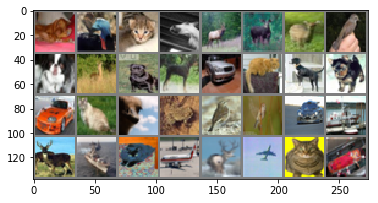

  dog      bird       cat     horse      deer      deer      deer      bird       dog      deer       dog       dog       car       cat       dog       dog       car       cat      bird      frog      bird      bird       car      ship      deer      ship       cat     plane      deer     plane       cat     truck

trainloader lengh: 1563
dataiter lengh: 1563


In [54]:
# show some random training images
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
dataiter = iter(trainloader)
images, labels = dataiter.next()
 
# print images
imshow(torchvision.utils.make_grid(images))
# print labels
print('     '.join('%5s'%classes[labels[j]] for j in range(BATCH_SIZE)))
print()
dataiter = iter(trainloader)
print("trainloader lengh: "+str(len(trainloader)))
print("dataiter lengh: "+str(len(dataiter)))

In [46]:
def train():
    """
    Performs training and evaluation of MLP model.
    NOTE: You should the model on the whole test set each eval_freq iterations.
    """
    # YOUR TRAINING CODE GOES HERE
    n_inputs = 3072
    
    n_hidden = list(map(int, DNN_HIDDEN_UNITS_DEFAULT.split()))

    n_classes = len(classes)

    mlp = PT_MLP(n_inputs, n_hidden, n_classes)
    
    # Loss and Optimizer
    criterion = nn.CrossEntropyLoss() 

    optimizer = torch.optim.SGD(mlp.parameters(), lr=LEARNING_RATE_DEFAULT)
    
    losses = []
    accuracy = []
    
    for epoch in range(MAX_EPOCHS_DEFAULT):
        timestart = time.time()
        running_loss = 0.0
        total = 0
        correct = 0
        for step, (batch_x, batch_y) in enumerate(trainloader):
            # zero the parameter gradients
            optimizer.zero_grad()
            # Forward + Backward + Optimize
            batch_x = batch_x.view(-1,3072)
            outputs = mlp(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            
            # print statistics
            running_loss += loss.item()
            # print("step ",step)
            if step % 500 == 499:  # print every 500 mini-batches
                    print('[%d, %5d] loss: %.4f' %
                          (epoch, step, running_loss / 500))
                    losses.append(running_loss / 500)
                    running_loss = 0.0
                    _, predicted = torch.max(outputs.data, 1)
                    total += batch_y.size(0)
                    correct += (predicted == batch_y).sum().item()
                    print('Accuracy of the network on the %d tran images: %.3f %%' % (total,
                            100.0 * correct / total))
                    accuracy.append(100.0 * correct / total)
                    total = 0
                    correct = 0
                    
        print('epoch %d cost %3f sec' %(epoch,time.time()-timestart))
    print('Finished Training')
    return mlp, losses, accuracy

In [47]:
mlp, losses, accuracy = train()

[0,   499] loss: 2.1415
Accuracy of the network on the 32 tran images: 12.500 %
[0,   999] loss: 1.9972
Accuracy of the network on the 32 tran images: 15.625 %
[0,  1499] loss: 1.9555
Accuracy of the network on the 32 tran images: 18.750 %
epoch 0 cost 7.443638 sec
[1,   499] loss: 1.9262
Accuracy of the network on the 32 tran images: 31.250 %
[1,   999] loss: 1.9155
Accuracy of the network on the 32 tran images: 34.375 %
[1,  1499] loss: 1.8999
Accuracy of the network on the 32 tran images: 43.750 %
epoch 1 cost 6.214837 sec
[2,   499] loss: 1.8950
Accuracy of the network on the 32 tran images: 31.250 %
[2,   999] loss: 1.8875
Accuracy of the network on the 32 tran images: 34.375 %
[2,  1499] loss: 1.8660
Accuracy of the network on the 32 tran images: 50.000 %
epoch 2 cost 6.367411 sec
[3,   499] loss: 1.8629
Accuracy of the network on the 32 tran images: 31.250 %
[3,   999] loss: 1.8521
Accuracy of the network on the 32 tran images: 40.625 %
[3,  1499] loss: 1.8690
Accuracy of the ne

[30,  1499] loss: 1.7790
Accuracy of the network on the 32 tran images: 28.125 %
epoch 30 cost 8.234279 sec
[31,   499] loss: 1.7607
Accuracy of the network on the 32 tran images: 43.750 %
[31,   999] loss: 1.7737
Accuracy of the network on the 32 tran images: 28.125 %
[31,  1499] loss: 1.7701
Accuracy of the network on the 32 tran images: 31.250 %
epoch 31 cost 7.297350 sec
[32,   499] loss: 1.7682
Accuracy of the network on the 32 tran images: 56.250 %
[32,   999] loss: 1.7660
Accuracy of the network on the 32 tran images: 21.875 %
[32,  1499] loss: 1.7632
Accuracy of the network on the 32 tran images: 34.375 %
epoch 32 cost 8.074140 sec
[33,   499] loss: 1.7604
Accuracy of the network on the 32 tran images: 37.500 %
[33,   999] loss: 1.7642
Accuracy of the network on the 32 tran images: 43.750 %
[33,  1499] loss: 1.7631
Accuracy of the network on the 32 tran images: 31.250 %
epoch 33 cost 6.857941 sec
[34,   499] loss: 1.7632
Accuracy of the network on the 32 tran images: 43.750 %
[

epoch 60 cost 14.846007 sec
[61,   499] loss: 1.7328
Accuracy of the network on the 32 tran images: 40.625 %
[61,   999] loss: 1.7397
Accuracy of the network on the 32 tran images: 28.125 %
[61,  1499] loss: 1.7406
Accuracy of the network on the 32 tran images: 40.625 %
epoch 61 cost 16.111290 sec
[62,   499] loss: 1.7436
Accuracy of the network on the 32 tran images: 43.750 %
[62,   999] loss: 1.7288
Accuracy of the network on the 32 tran images: 40.625 %
[62,  1499] loss: 1.7414
Accuracy of the network on the 32 tran images: 34.375 %
epoch 62 cost 16.306155 sec
[63,   499] loss: 1.7223
Accuracy of the network on the 32 tran images: 28.125 %
[63,   999] loss: 1.7265
Accuracy of the network on the 32 tran images: 37.500 %
[63,  1499] loss: 1.7436
Accuracy of the network on the 32 tran images: 18.750 %
epoch 63 cost 13.044507 sec
[64,   499] loss: 1.7252
Accuracy of the network on the 32 tran images: 43.750 %
[64,   999] loss: 1.7366
Accuracy of the network on the 32 tran images: 34.375

[91,   999] loss: 1.7184
Accuracy of the network on the 32 tran images: 40.625 %
[91,  1499] loss: 1.7208
Accuracy of the network on the 32 tran images: 40.625 %
epoch 91 cost 11.090415 sec
[92,   499] loss: 1.7228
Accuracy of the network on the 32 tran images: 31.250 %
[92,   999] loss: 1.7316
Accuracy of the network on the 32 tran images: 43.750 %
[92,  1499] loss: 1.7174
Accuracy of the network on the 32 tran images: 40.625 %
epoch 92 cost 11.266880 sec
[93,   499] loss: 1.7234
Accuracy of the network on the 32 tran images: 31.250 %
[93,   999] loss: 1.7223
Accuracy of the network on the 32 tran images: 37.500 %
[93,  1499] loss: 1.7148
Accuracy of the network on the 32 tran images: 46.875 %
epoch 93 cost 11.968255 sec
[94,   499] loss: 1.7204
Accuracy of the network on the 32 tran images: 43.750 %
[94,   999] loss: 1.7151
Accuracy of the network on the 32 tran images: 31.250 %
[94,  1499] loss: 1.7215
Accuracy of the network on the 32 tran images: 31.250 %
epoch 94 cost 12.129730 s

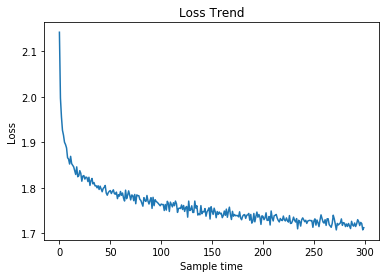

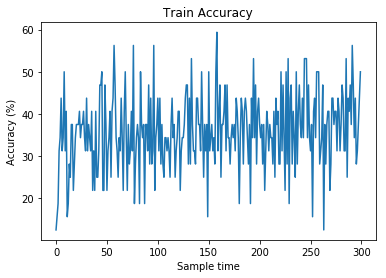

In [50]:
plt.title('Loss Trend')

plt.plot(losses)
    
plt.xlabel('Sample time')
    
plt.ylabel('Loss')
    
plt.show()

plt.title('Train Accuracy')

plt.plot(accuracy)
    
plt.xlabel('Sample time')
    
plt.ylabel('Accuracy (%)')
    
plt.show()



In [51]:
def test(mlp):
    total = 0
    correct = 0
    accuracy = []
    for step, (batch_x, batch_y) in enumerate(testloader):
        batch_x = batch_x.view(-1,3072)
        outputs = mlp(batch_x)
        # print statistics
        # print("step ",step)
        if step % 20 == 19:  # print every 500 mini-batches
                _, predicted = torch.max(outputs.data, 1)
                total += batch_y.size(0)
                correct += (predicted == batch_y).sum().item()
                accuracy.append(100.0 * correct / total)
                total = 0
                correct = 0
    print('Finished Testing')
    return accuracy

In [52]:
test_accuracy = test(mlp)

Finished Testing


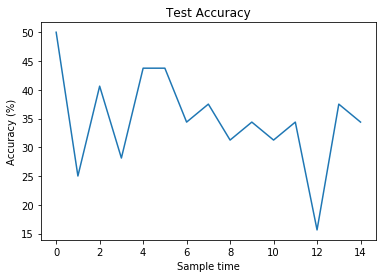

Average test accuracy is : 34.791666666666664


In [53]:
plt.title('Test Accuracy')

plt.plot(test_accuracy)
    
plt.xlabel('Sample time')
    
plt.ylabel('Accuracy (%)')
    
plt.show()

avg_test_accuracy = np.mean(test_accuracy)
print("Average test accuracy is : " + str(avg_test_accuracy))